In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
from scipy.stats import linregress

The dataset I chose is a music dataset titled “Spotify and YouTube”. I found it on Kaggle, and it provides the satistics of the top 10 songs of different Spotify artists and their corresponding YouTube videos. The data was retrieved using the applications’ respective APIs. There is north of 17K different tracks (2K different artists) and 26 different variables (or features). Some of those features or generic such as song title and artist and album name, but the ones I want to focus mostly on are “danceability”, “speechiness”, “liveness”, “tempo”, etc. This data is presented in the form of an excel .csv file, which would allow me to easily import into python IDEs. Also, the data set is in the public domain (CC0: Public Domain). My main goal from this data set is to be able to train a model to recommend new music based on the features of liked songs.  

# Figure 1 - Shows the top 20 artists based off of Spotify Sream numbers:

### Load data from CSV

In [3]:
df = pd.read_csv('Spotify_Youtube.csv')

### Group by artist and sum the number of streams

In [4]:
artist_streams = df.groupby('Artist')['Stream'].sum().reset_index()

### Sort the data by the total number of streams in descending order

In [5]:
artist_streams = artist_streams.sort_values(by='Stream', ascending=False)

### Select the top 20 artists

In [6]:
top_20_artists = artist_streams.head(20)

### Plotting

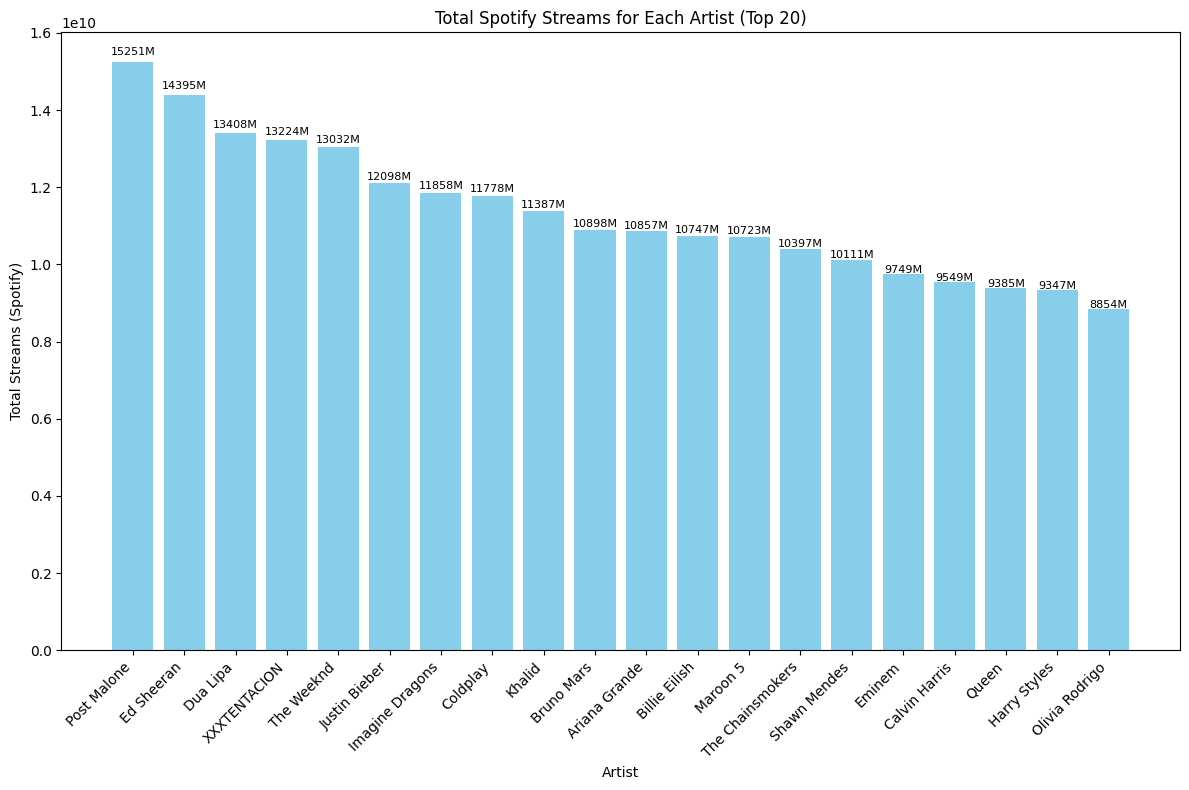

In [10]:
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(top_20_artists['Artist'])), top_20_artists['Stream'], color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Total Streams (Spotify)')
plt.title('Total Spotify Streams for Each Artist (Top 20)')
plt.xticks(range(len(top_20_artists['Artist'])), top_20_artists['Artist'], rotation=45, ha='right')

# Adding numbers on top of every bar 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval*1.025, f'{yval/1e6:.0f}M', ha='center',va='top', fontsize=8)

plt.tight_layout()
plt.savefig('top_20_artist_streams_plot.png')
plt.show()

# Figure 2 - Comparing Danceability and Speechiness in the top 1K songs
## Any song on spotify has a number vaue for a set of attributes. These are the attributes below:
- Danceability: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Energy: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- Key: the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- Loudness: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- Speechiness: detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- Acousticness: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- Instrumentalness: predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- Liveness: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- Valence: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
Tempo: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

##### Select the top 1000 tracks based on stream count

In [11]:
top_1K_tracks = df.nlargest(1000, 'Stream')

# Plotting attributes against stream count

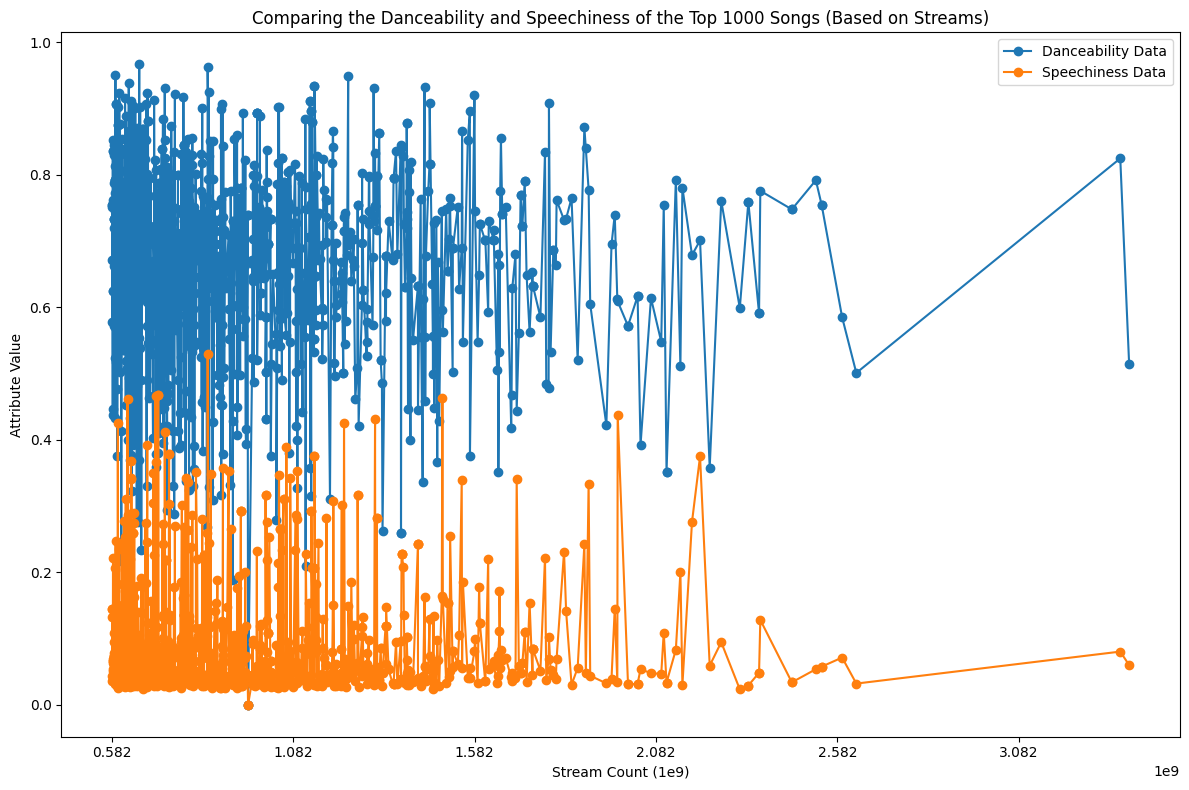

In [12]:
plt.figure(figsize=(12, 8))
attributes = ['Danceability','Speechiness']

for attribute in attributes:
    # Plot the data points
    plt.plot(top_1K_tracks['Stream'], top_1K_tracks[attribute],'o-', label=f'{attribute} Data')

plt.xlabel('Stream Count (1e9)')
plt.ylabel('Attribute Value')
plt.title('Comparing the Danceability and Speechiness of the Top 1000 Songs (Based on Streams)')
plt.legend()

# Set x-axis ticks to start from the minimum value of 'Stream'
min_stream = int(min(top_1K_tracks['Stream']))
max_stream = int(max(top_1K_tracks['Stream']))
subset_values = range(min_stream, max_stream, 500000000)  # Adjust the step size as needed
plt.xticks(subset_values)

plt.tight_layout()
plt.savefig('Danceability_vs_Speechiness_Top_1K_Songs.png')
plt.show()

#### Originally I had expected that more "speechy" music would be less common to stream more than once compared to more "danceable" songs. This graph clearly shows what I was expecting in the top streamed songs. 

## Interactive Chart

The interactive chart is the same as Figure 1. However, you are able to click on every barchart and it will give you the song-stream breakdown for the artist you clicked on their barchart. To access the interactive chart, run "interactive_chart.py" and open the https link that will be shown in ther cmd prompt.